In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-marketing.csv')

In [3]:
df.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  pdays  previous  \
0     yes   no  unknown    5   may       261         1     -1         0   
1     yes   no  unknown    5   may       151         1     -1         0   
2     yes  yes  unknown    5   may        76         1     -1         0   
3     yes   no  unknown    5   may        92         1     -1         0   
4      no   no  unknown    5   may       198         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
numeric = df.select_dtypes('number')
categoric = df.select_dtypes('object')

In [7]:
df.describe()

age         salary        balance           day      duration  \
count  45211.000000   45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210   57006.171065    1362.272058     15.806419    258.163080   
std       10.618762   32085.718415    3044.765829      8.322476    257.527812   
min       18.000000       0.000000   -8019.000000      1.000000      0.000000   
25%       33.000000   20000.000000      72.000000      8.000000    103.000000   
50%       39.000000   60000.000000     448.000000     16.000000    180.000000   
75%       48.000000   70000.000000    1428.000000     21.000000    319.000000   
max       95.000000  120000.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

From the above statistical summary it is clear that there are outliers present in the pdays column as it can be seen that the minimum, median value of the variable is -1 and mean is 40.2.There are good chances that -1 indicates missing values and most of the records are missing and therefore, it shows the recorded values as outliers.

Mean of the pdays column is 40.2 and median is -1 through which we can say that there are extreme data points available in the data. This might be due to the fact that bank often contacts individuals to convenience them and sometimes it may happen that few people are not in contact and there may be seveal reasons for that.

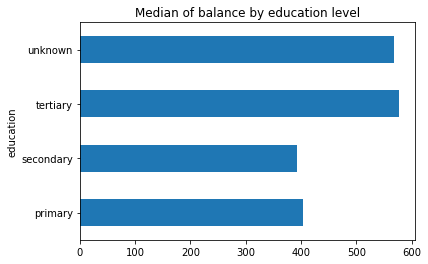

In [8]:
df.groupby('education')['balance'].median().plot.barh(title='Median of balance by education level')
plt.show()

People from higher level of education seems to have higher bank balance and other than this people falling in unknown category are closer in terms to bank balance to tertiary one.

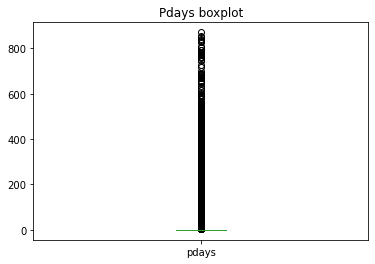

In [9]:
df.pdays.plot.box(title='Pdays boxplot')
plt.show()

From the above plot it is clear that there are outliers present in the variable. There are a lot of outliers are present in the data.

# Bivariate Analysis

### Categorical Analysis

In [10]:
categoric.drop('response',axis=1, inplace=True)

In [11]:
def categoric_plot(col):
    col = pd.crosstab(df[col], df['response'])
    col.div(col.sum(1).astype(float), axis=0).plot.bar(stacked=True)

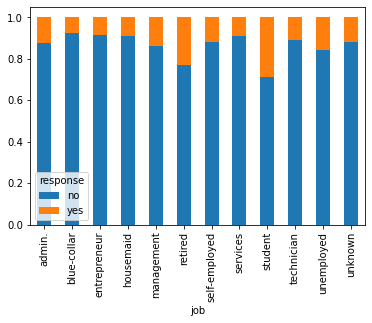

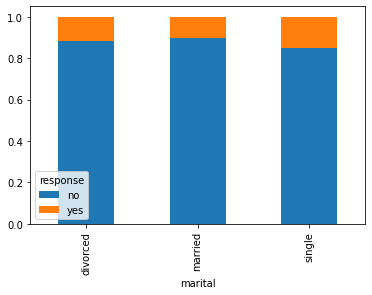

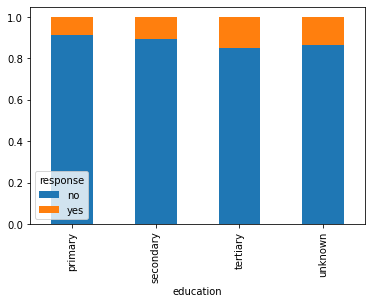

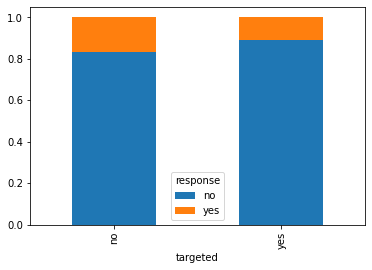

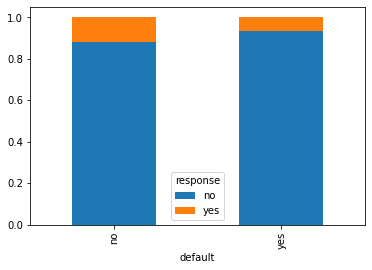

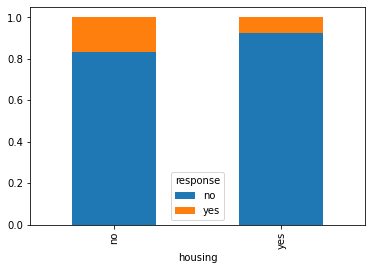

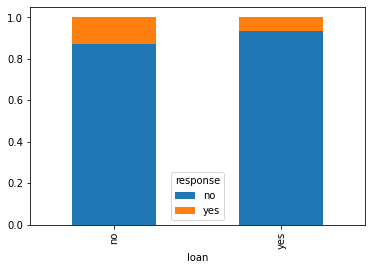

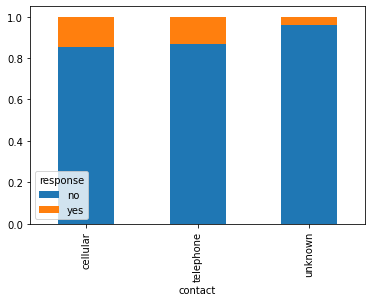

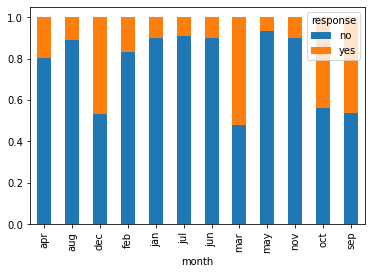

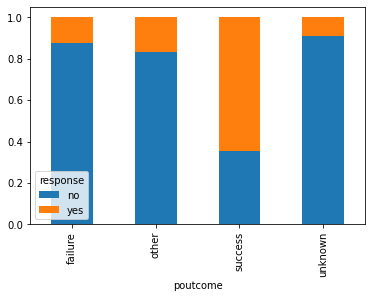

In [12]:
for col in categoric:
    categoric_plot(col)

Inferences:
1. People falling in the category of student and retired seems to give more positive response than other categories people.
2. The marital status of an individual dosen't have a significant impact on the response.
3. Highly educated people seems to respond positively.
4. People who were engaged in this type of investment seems to show lack of interest.
5. People who have taken housing loan seems to respond negatively.
6. Personal loan holders are dosen't show much interest.
7. More people being contacted from cellular and telephone have responded positively.
8. In the month of mar, oct sep and dec people tend to respond positively.
9. People given positive responses in the past have higher chances of accepting the plan.

### Numerical Analysis

In [13]:
def numeric_plot(col, fig):
    plt.figure(figsize=(15,42))
    plt.subplot(8,2,fig)
    sns.distplot(df[col])
    plt.subplot(8,2,fig+1)
    sns.boxplot(x='response', y=col, data=df)

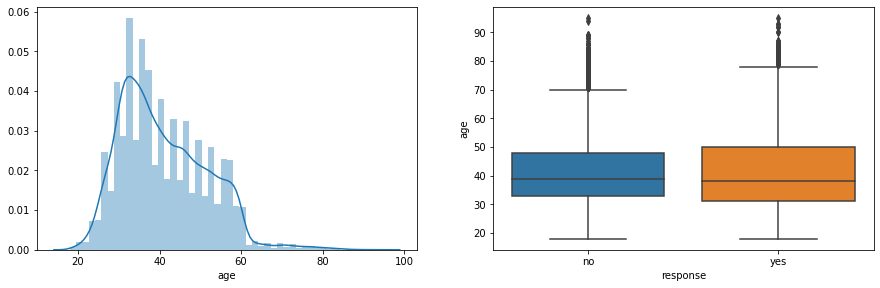

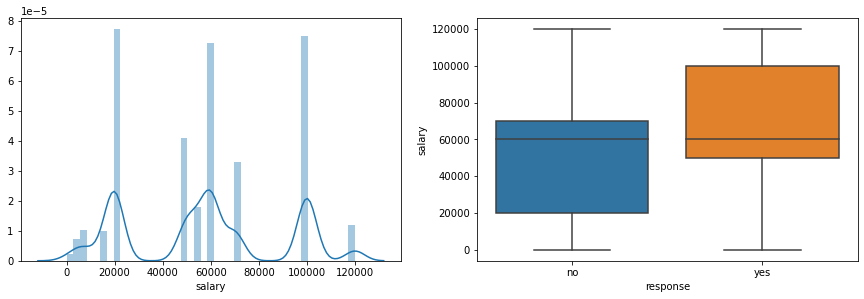

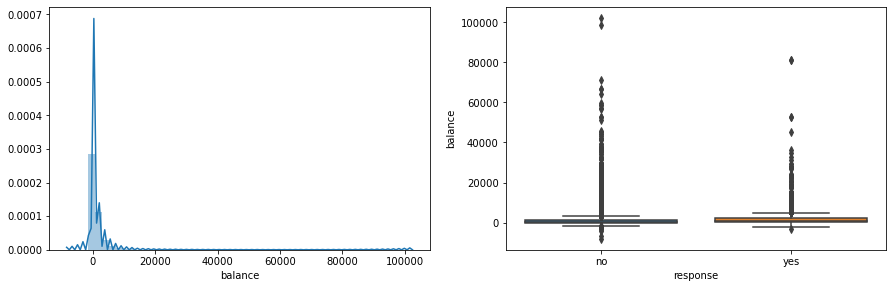

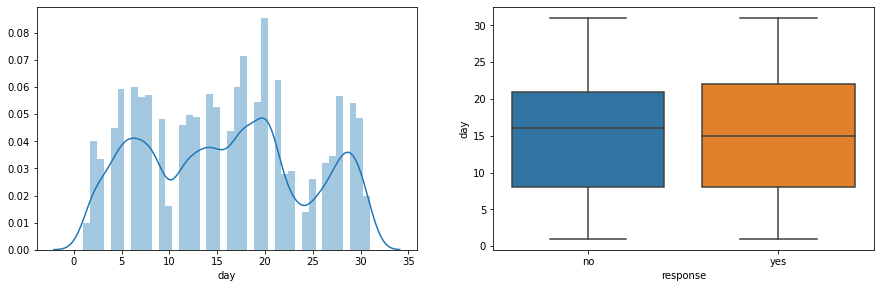

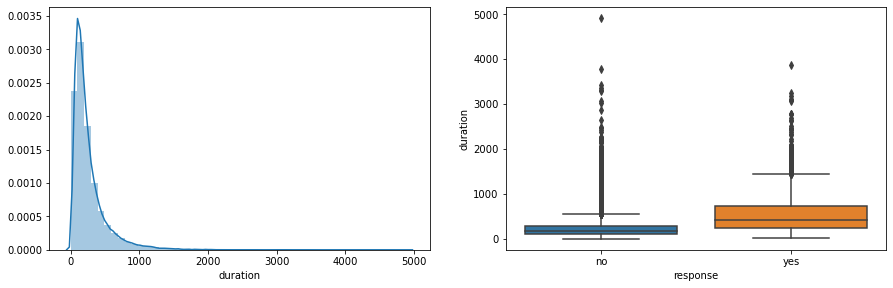

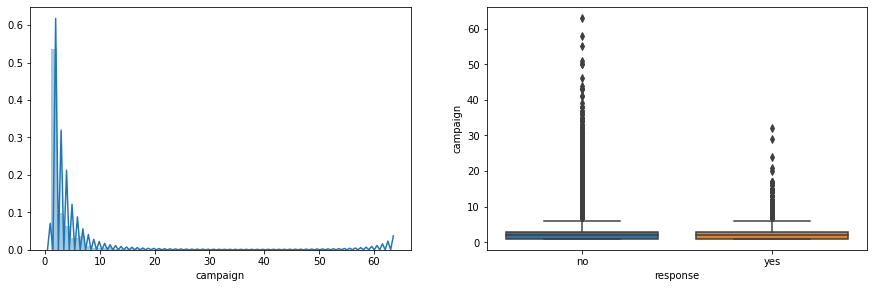

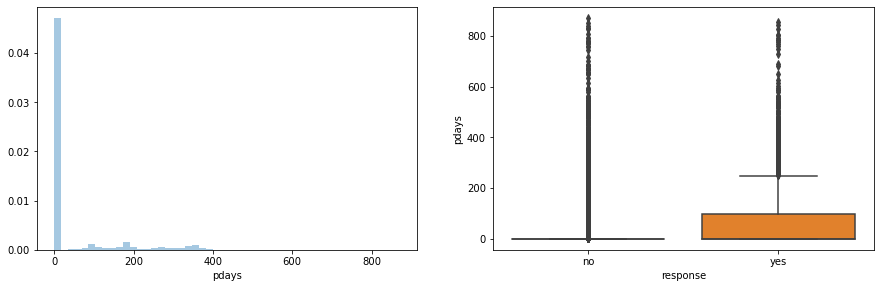

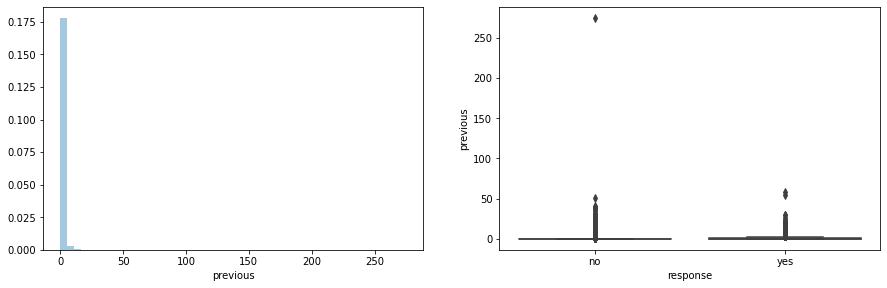

In [14]:
x = 1
for col in numeric.columns:
    numeric_plot(col, x)
    x = x + 2


Inferences:
1. The people in contact with the bank are mostly in the age group of 30 to 47.
2. People who give positive responses have higher salary range.
3. On an average people who took longer duration to decide tend to invest.

Yes, the variable pdays and poutcome seems to affect our target variable.

In [15]:
pdays = df.pdays.replace(-1,abs(-1))

In [16]:
pdays = np.sqrt(pdays)
pdays.skew()

1.9864375503881506

In [17]:
from scipy import stats

In [18]:
# Map pdays=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
df.loc[df['pdays']==-1, 'pdays'] = 10000

In [19]:
df.pdays.describe()

count    45211.000000
mean      8214.689744
std       3777.244242
min          1.000000
25%      10000.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: pdays, dtype: float64

In [20]:
# Create a new column: recent_pdays 
df['recent_pdays'] = np.where(df['pdays'], 1/df.pdays, 1/df.pdays)

# Drop 'pdays'
df.drop('pdays', axis=1, inplace = True)

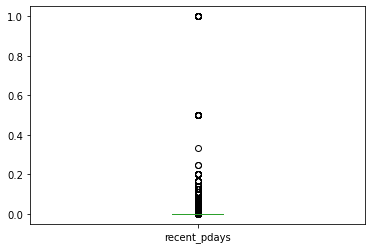

In [21]:
df.recent_pdays.plot.box()

In [22]:
df.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  previous poutcome  \
0     yes   no  unknown    5   may       261         1         0  unknown   
1     yes   no  unknown    5   may       151         1         0  unknown   
2     yes  yes  unknown    5   may        76         1         0  unknown   
3     yes   no  unknown    5   may        92         1         0  unknown   
4      no   no  unknown    5   may       198         1         0  unknown   

  response  recent_pdays  
0       no        0.0001  
1       no        0.0001  
2       no        0.0001  
3       no        0.0001  
4       no        0.0001

In [23]:
numeric = df.select_dtypes('number')

In [24]:
def get_dummies(col,df):
    temp = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([col], axis=1, inplace=True)
    return df

for col in categoric.columns:
    df = get_dummies(col,df)

In [25]:
df.head()

age  salary  balance  day  duration  campaign  previous response  \
0   58  100000     2143    5       261         1         0       no   
1   44   60000       29    5       151         1         0       no   
2   33  120000        2    5        76         1         0       no   
3   47   20000     1506    5        92         1         0       no   
4   33       0        1    5       198         1         0       no   

   recent_pdays  blue-collar  ...  jul  jun  mar  may  nov  oct  sep  other  \
0        0.0001            0  ...    0    0    0    1    0    0    0      0   
1        0.0001            0  ...    0    0    0    1    0    0    0      0   
2        0.0001            0  ...    0    0    0    1    0    0    0      0   
3        0.0001            1  ...    0    0    0    1    0    0    0      0   
4        0.0001            0  ...    0    0    0    1    0    0    0      0   

   success  unknown  
0        0        1  
1        0        1  
2        0        1  
3        0        1  
4        0        1  

[5 rows x 45 columns]

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric.columns] = scaler.fit_transform(df[numeric.columns])

In [27]:
df.head()

age    salary   balance       day  duration  campaign  previous  \
0  0.519481  0.833333  0.092259  0.133333  0.053070       0.0       0.0   
1  0.337662  0.500000  0.073067  0.133333  0.030704       0.0       0.0   
2  0.194805  1.000000  0.072822  0.133333  0.015453       0.0       0.0   
3  0.376623  0.166667  0.086476  0.133333  0.018707       0.0       0.0   
4  0.194805  0.000000  0.072812  0.133333  0.040260       0.0       0.0   

  response  recent_pdays  blue-collar  ...  jul  jun  mar  may  nov  oct  sep  \
0       no           0.0            0  ...    0    0    0    1    0    0    0   
1       no           0.0            0  ...    0    0    0    1    0    0    0   
2       no           0.0            0  ...    0    0    0    1    0    0    0   
3       no           0.0            1  ...    0    0    0    1    0    0    0   
4       no           0.0            0  ...    0    0    0    1    0    0    0   

   other  success  unknown  
0      0        0        1  
1      0        0        1  
2      0        0        1  
3      0        0        1  
4      0        0        1  

[5 rows x 45 columns]

In [28]:
X = df.drop('response', 1)
y = df.response

In [29]:
y.replace({'yes':1, 'no':0},inplace=True)

# Model Building

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, f1_score

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [157]:
cv_score = cross_val_score(model, X_train, y_train, cv=5)

In [158]:
np.mean(cv_score)

0.9003814498572936

In [159]:
y_pred = model.predict(X_test)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7990
           1       0.68      0.33      0.44      1053

    accuracy                           0.90      9043
   macro avg       0.80      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



In [161]:
print(f1_score(y_test,y_pred))

0.44074311338885336


In [162]:
X_train.shape, X_test.shape

((36168, 44), (9043, 44))

# Feature Selection

In [163]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 18)
rfe = rfe.fit(X_train, y_train)

In [164]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 27),
 ('salary', False, 22),
 ('balance', True, 1),
 ('day', False, 4),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('previous', True, 1),
 ('recent_pdays', False, 3),
 ('blue-collar', False, 14),
 ('entrepreneur', False, 12),
 ('housemaid', True, 1),
 ('management', False, 16),
 ('retired', False, 6),
 ('self-employed', False, 13),
 ('services', False, 18),
 ('student', True, 1),
 ('technician', False, 19),
 ('unemployed', False, 17),
 ('unknown', False, 15),
 ('married', False, 8),
 ('single', False, 23),
 ('secondary', False, 21),
 ('tertiary', False, 10),
 ('unknown', False, 20),
 ('yes', False, 26),
 ('yes', False, 25),
 ('yes', True, 1),
 ('yes', False, 2),
 ('telephone', False, 7),
 ('unknown', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', False, 11),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', True, 1),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', True, 1),
 ('other', False, 9),
 ('success', True, 1),
 

In [165]:
X_train.columns[rfe.support_]

Index(['balance', 'duration', 'campaign', 'previous', 'housemaid', 'student',
       'yes', 'unknown', 'aug', 'dec', 'jan', 'jul', 'jun', 'mar', 'nov',
       'oct', 'sep', 'success'],
      dtype='object')

In [166]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [167]:
model.fit(X_train_rfe,y_train)

LogisticRegression()

In [168]:
X_test = X_test[X_test.columns[rfe.support_]]

In [169]:
model.fit(X_train_rfe,y_train)

LogisticRegression()

In [170]:
y_pred2 = model.predict(X_test)

In [171]:
f1_score(y_test,y_pred2)

0.44087403598971725

In [172]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [173]:
build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     631.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:28:25   Log-Likelihood:                -3954.3
No. Observations:               36168   AIC:                             7959.
Df Residuals:                   36143   BIC:                             8171.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0705      0.008      8.525      0.0

const   balance  duration  campaign  previous  housemaid  student  yes  \
42162    1.0  0.072976  0.103497  0.016129       0.0          0        0    1   
29111    1.0  0.078115  0.020333  0.000000       0.0          0        0    0   
14409    1.0  0.073085  0.025214  0.032258       0.0          0        0    0   
10628    1.0  0.081819  0.015860  0.000000       0.0          0        0    1   
2808     1.0  0.080766  0.048394  0.000000       0.0          0        0    1   
...      ...       ...       ...       ...       ...        ...      ...  ...   
31074    1.0  0.086177  0.024603  0.016129       0.0          0        0    1   
22315    1.0  0.072858  0.016673  0.016129       0.0          0        0    1   
4197     1.0  0.073457  0.021350  0.000000       0.0          0        0    1   
19178    1.0  0.081337  0.249492  0.016129       0.0          0        0    1   
26123    1.0  0.076008  0.021757  0.016129       0.0          0        0    1   

       yes  yes  ...  aug  dec  jan  jul  jun  mar  nov  oct  sep  success  
42162    0    0  ...    0    0    0    0    0    0    1    0    0        0  
29111    0    1  ...    0    0    0    0    0    0    0    0    0        0  
14409    0    1  ...    0    0    0    1    0    0    0    0    0        0  
10628    0    1  ...    0    0    0    0    1    0    0    0    0        0  
2808     0    1  ...    0    0    0    0    0    0    0    0    0        0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...  
31074    0    1  ...    0    0    0    0    0    0    0    0    0        0  
22315    0    0  ...    1    0    0    0    0    0    0    0    0        0  
4197     0    1  ...    0    0    0    0    0    0    0    0    0        0  
19178    0    0  ...    1    0    0    0    0    0    0    0    0        0  
26123    0    1  ...    0    0    0    0    0    0    1    0    0        0  

[36168 rows x 25 columns]

In [174]:
checkVIF(X_train_rfe)

Features   VIF
13    unknown  8.73
0     balance  7.47
6         yes  5.69
8         yes  2.66
12    unknown  2.63
1    duration  1.97
14        aug  1.78
17        jul  1.76
3    previous  1.59
18        jun  1.57
2    campaign  1.41
20        nov  1.33
11    unknown  1.28
9         yes  1.25
23    success  1.22
16        jan  1.10
21        oct  1.07
22        sep  1.06
4   housemaid  1.04
10    unknown  1.04
19        mar  1.04
5     student  1.04
15        dec  1.03
7         yes  1.03

In [175]:
cv_score2 = cross_val_score(model,X_train_rfe,y_train, cv=5)

In [176]:
np.mean(cv_score2)

0.9005196897869375

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7990
           1       0.68      0.33      0.44      1053

    accuracy                           0.90      9043
   macro avg       0.80      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [180]:
params_grid = {'n_estimators' : [10,20,35,50],
              'criterion' : ['gini', 'entropy'],
               'max_depth' : [10,20,30,50]
              }

In [181]:
rfc = RandomForestClassifier()

In [182]:
random_search = RandomizedSearchCV(rfc, param_distributions=params_grid, n_iter=10, cv=10)

In [183]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 50],
                                        'n_estimators': [10, 20, 35, 50]})

In [184]:
random_search.best_estimator_.n_estimators

50

In [185]:
random_search.best_estimator_.criterion

'gini'

In [186]:
random_search.best_estimator_.max_depth

30

In [187]:
rfc2 = RandomForestClassifier(n_estimators=35, criterion='gini', max_depth=30)

In [188]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=35)

In [65]:
print(np.mean(cross_val_score(rfc2, X_train, y_train, cv=5)))

0.9030359118409498


In [189]:
y_pred = rfc2.predict(X_test)

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7991
           1       0.62      0.36      0.46      1052

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [191]:
f1_score(y_test, y_pred)

0.45542168674698796

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
confusion_matrix(y_test, y_pred)

array([[7761,  230],
       [ 674,  378]], dtype=int64)

In [236]:
rfe1 = RFE(rfc2, 15)
rfe1.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=30, n_estimators=35),
    n_features_to_select=15)

In [237]:
rfe1.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False])

In [238]:
cols = X_train.columns[rfe1.support_]

In [239]:
rfc2.fit(X_train[cols], y_train)

RandomForestClassifier(max_depth=30, n_estimators=35)

In [243]:
y_pred2 = rfc2.predict(X_test[cols])

In [247]:
f1_score(y_test, y_pred2)

0.4711425206124853

In [248]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7991
           1       0.62      0.38      0.47      1052

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



In [253]:
checkVIF(X_train[X_train.columns[rfe1.support_]])

Features    VIF
10           yes  11.66
2        balance   8.72
17       unknown   7.69
0            age   6.13
3            day   4.22
1         salary   4.15
8        married   3.79
9      secondary   3.02
12           yes   2.46
16       unknown   2.14
4       duration   1.99
18           jun   1.58
15       unknown   1.40
5       campaign   1.39
6       previous   1.36
13           yes   1.22
20       success   1.21
14       unknown   1.06
7   recent_pdays   1.04
11           yes   1.03
19           mar   1.02

# Results

1. In order to evaluate the model performance f1-score and classification_report is choosen as an evaluation parameter. f1-score is choosen as an evaluation parameter because it considers both precision and recall is used and classification_report gives the detailed summary of the prediction.

2. Random forest seems to have higher f1-score than logistic regression. Thus, we can say that random forest model is able to recognise false positive and false negative better.

3. Important features from both the models :

In [250]:
X_train.columns[rfe.support_]

Index(['balance', 'duration', 'campaign', 'previous', 'housemaid', 'student',
       'yes', 'unknown', 'aug', 'dec', 'jan', 'jul', 'jun', 'mar', 'nov',
       'oct', 'sep', 'success'],
      dtype='object')

In [251]:
X_train.columns[rfe1.support_]

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous',
       'recent_pdays', 'married', 'secondary', 'yes', 'unknown', 'jun', 'mar',
       'success'],
      dtype='object')

Beside few of the features in both the models there are differences between the feature selection from both the model and which has played a key role in greater f1-score of random forest model.